In [40]:
import pandas as pd
import ast

In [41]:
blues_df = pd.read_csv("Blues_df.csv")
classical_df = pd.read_csv("Classical_df.csv")
country_df = pd.read_csv("Country_df.csv")
disco_df = pd.read_csv("Disco_df.csv")
hiphop_df = pd.read_csv("Hiphop_df.csv")
jazz_df = pd.read_csv("Jazz_df.csv")
metal_df = pd.read_csv("Metal_df.csv")
pop_df = pd.read_csv("Pop_df.csv")
reggae_df = pd.read_csv("Reggae_df.csv")
rock_df = pd.read_csv("Rock_df.csv")

In [42]:
blues_df

,Genre,Chords,First Chord,Most Popular Chords
0,Blues,"['Gm7', 'G']",G,Gm7
1,Blues,"['Dm7b5/C', 'Cmaj7', 'Gm7', 'F/C', 'Cmaj7']",D,"['Dm7b5/C', 'Cmaj7', 'Gm7']"
2,Blues,"['E7', 'A7', 'Em', 'Bm7b5/A']",E,"['E7', 'A7', 'Em']"
3,Blues,"['E7', 'Em7']",E,E7
4,Blues,"['Fm', 'Cm', 'Bb/F', 'Fm']",F,"['Fm', 'Cm', 'Bb/F']"
...,...,...,...,...
95,Blues,"['F#m7', 'Bmaj7', 'Gm6', 'Abdim', 'A/C#', 'F#/...",F,"['F#m7', 'Bmaj7', 'Gm6']"
96,Blues,"['E', 'A', 'E', 'Emaj7', 'E', 'F#7', 'Emaj7', ...",E,"['E', 'A', 'Emaj7']"
97,Blues,"['Bm', 'F#m7b5/E', 'Gmaj7', 'Cmaj7', 'F#m', 'G...",B,"['Bm', 'F#m7b5/E', 'Gmaj7']"
98,Blues,"['C7', 'F7', 'Am7b5/G', 'C7', 'G7', 'F7', 'C7'...",C,"['C7', 'F7', 'Am7b5/G']"


## All chords in one dataset per genre

In [102]:
def chords(df):
    data = pd.DataFrame(columns = ["Chords"])
    for i in range(df.shape[0]):
        a = df.Chords.loc[i]
        a = ast.literal_eval(a)
        a = [n.strip() for n in a]
        for j in range (len(a)):
            #print(a[j])
            data = data.append({"Chords" : a[j]}, ignore_index = True)
    return data

In [128]:
blues_chords = chords(blues_df)
classical_chords = chords(classical_df)
country_chords = chords(country_df)
disco_chords = chords(disco_df)
hiphop_chords = chords(hiphop_df)
jazz_chords = chords(jazz_df)
metal_chords = chords(metal_df)
pop_chords = chords(pop_df)
reggae_chords = chords(reggae_df)
rock_chords = chords(rock_df)

In [176]:
blues_chords

,Chords
0,Gm7
1,G
2,Dm7b5/C
3,Cmaj7
4,Gm7
...,...
755,Cm6
756,Bb/C
757,F7/A
758,Cm7


In [173]:
reggae_chords["Chords"].nunique()

109

In [175]:
blues_chords["Chords"].value_counts()

Bb         33
F          32
E          22
Eb7        18
C7         17
           ..
Dm7b5       1
B/A         1
Am7b5/G     1
Ddim        1
Fm7b5       1
Name: Chords, Length: 140, dtype: int64

## Graphs to illustrate main chords per genre

In [146]:
import matplotlib.pyplot as plt
def plot_main_chords(df, name):
    plt.figure(figsize=(8,8))
    df.Chords.value_counts(normalize = True)[:10].plot.bar()
    plt.xlabel("Chords")
    plt.ylabel("Normalised count")
    plt.title(label=name,
          fontsize=20,
          color="green")

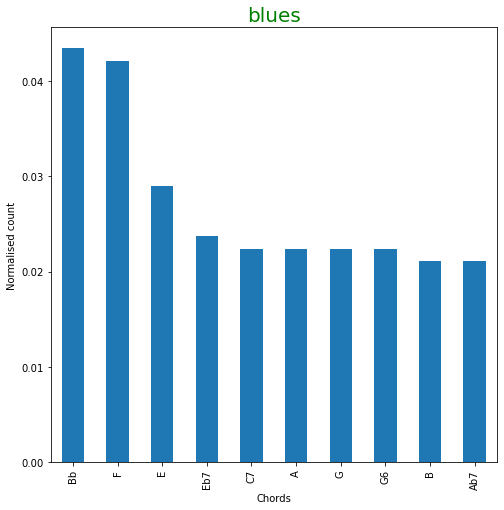

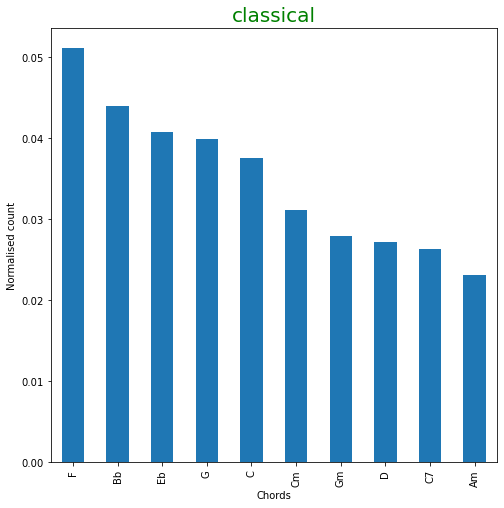

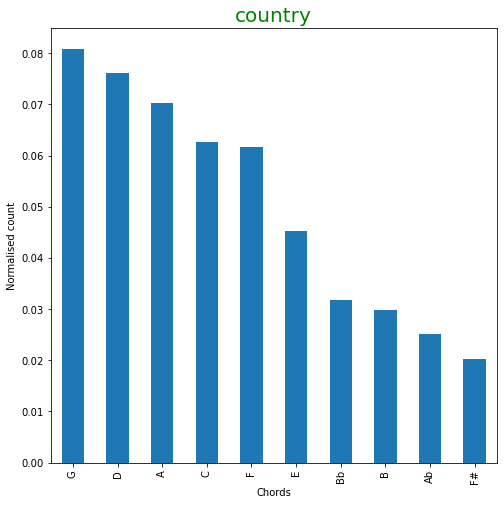

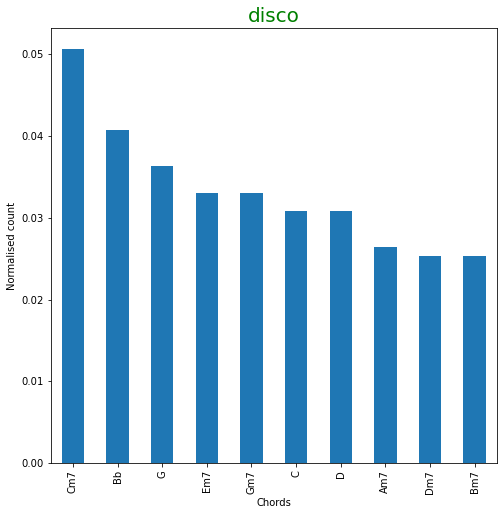

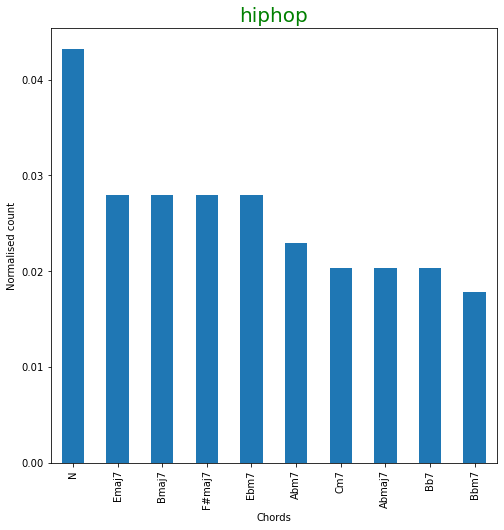

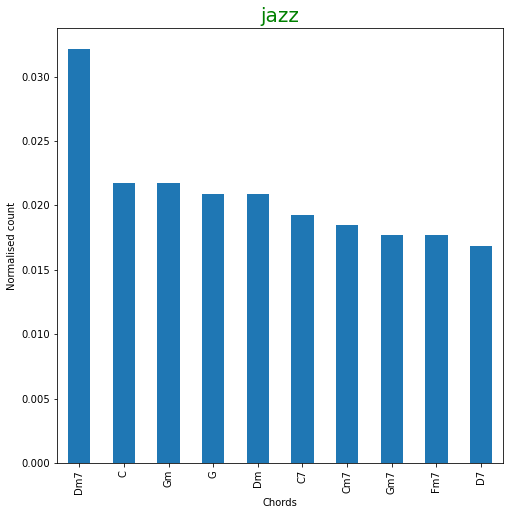

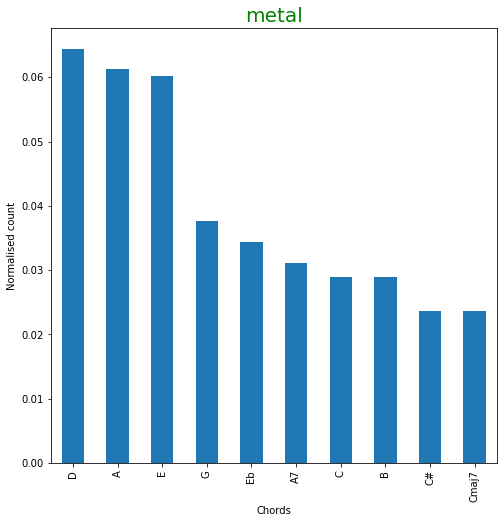

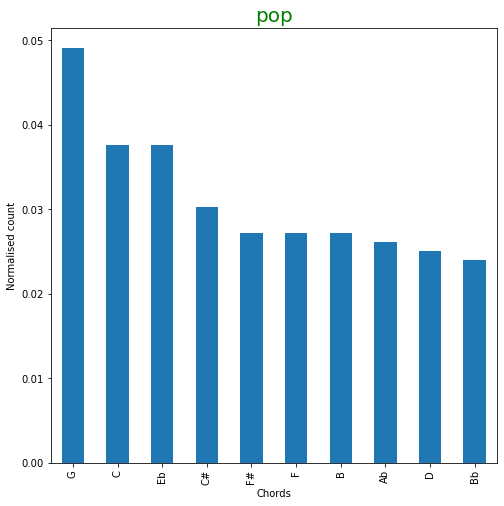

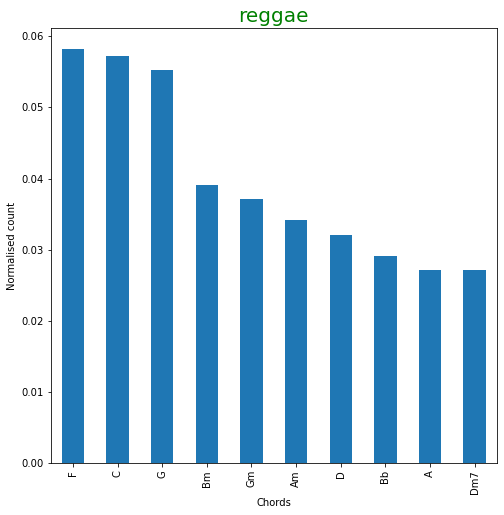

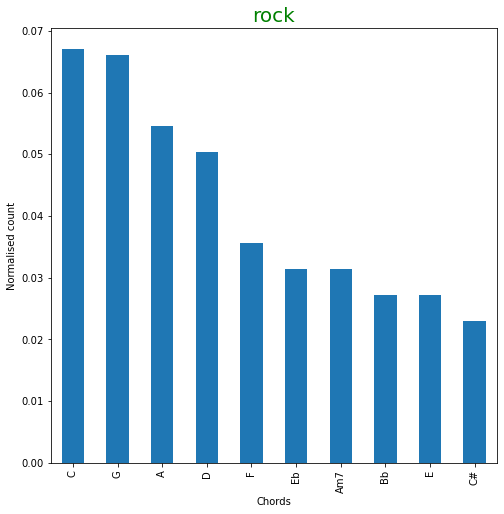

In [147]:
dataframes = [blues_chords, classical_chords, country_chords, disco_chords, hiphop_chords, jazz_chords, metal_chords, pop_chords, reggae_chords, rock_chords]
name = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
for i in range(len(dataframes)):
    plot_main_chords(dataframes[i], name[i])

### Country
Based on the results, we could say that for genre country most popular chords were G, D, A, C. When we put these chords into chord progression, we can see that it basically follows the main chord progerssion for country music. I IV V. In our case G (I), C(IV) and D (V).

### Blues
The most popular chords were Bb and F, which could indicate that key of the song could either of that and harmonic functions I and IV or I and V, which is follows the main harmonic progression. I I I I IV IV I I V IV I I. In blues genre more dominant chords should dominate, because main progession includes everywhere the 7th.

### Classical
Classical music chords is hard to interpret, because classical music sheet music doesm´t contain chords written above the note lines.

### Hiphop
It was interesting that main chords did contain 7th and major7.

### Jazz
For jazz music II-V-I progression is must have. And If we look the most popular chords, the Dm7 could be (II) in major and G(V) and C (I). Dm7 could be also with minor key song, being then I. 

### Metal
Can be diatonical and not 
 i - VI - III - VII,  i - VI or i - v

### Pop
Usually pop songs have chords like sus2, sus4 or add2, which characterize the genre, but in this case only major chords dominated.

### Reggae
Similar to country, it seems that there is progression C F G (I, IV, V). 

### Rock
First five chords can characterize the genre, because usually simple chords are used, even only chords which include the interval perfect fifth.

In conclusion, these genres mostly use major and minor triad and progression I IV V could be common.
But to make overall conclusions, the dataset was too small, only 30 s clips from different parts of songs, because of that we could´t transpos chords to the same key.

## All chords into one dataframe

In [149]:
df_all = pd.DataFrame(columns = ["Genre", "Chords"])

In [150]:
def add(genre, df, full_df): #Method to add all subdataframes to a big dataframe containing song genres and chords
    for i in range(df.shape[0]):
        a = df.Chords.loc[i]
        a = ast.literal_eval(a)
        a = [n.strip() for n in a]
        full_df = full_df.append({"Genre" : genre, "Chords" : a}, ignore_index = True)
    return full_df

In [152]:
df_all = add("Blues", blues_df, df_all)

In [154]:
df_all = add("Classical", classical_df, df_all)

In [156]:
df_all = add("Country", country_df, df_all)

In [157]:
df_all = add("Disco", disco_df, df_all)
df_all = add("Hiphop", hiphop_df, df_all)
df_all = add("Jazz", jazz_df, df_all)
df_all = add("Metal", metal_df, df_all)
df_all = add("Pop", pop_df, df_all)
df_all = add("Reggae", reggae_df, df_all)
df_all = add("Rock", rock_df, df_all)

In [158]:
df_all

,Genre,Chords
0,Blues,"[Gm7, G]"
1,Blues,"[Dm7b5/C, Cmaj7, Gm7, F/C, Cmaj7]"
2,Blues,"[E7, A7, Em, Bm7b5/A]"
3,Blues,"[E7, Em7]"
4,Blues,"[Fm, Cm, Bb/F, Fm]"
...,...,...
975,Rock,"[D, G, D, Gmaj7, D, G]"
976,Rock,"[A, C#m, D, E, A, C#m]"
977,Rock,"[B, Gmaj7, Em7, D, C6, B, G, D, C]"
978,Rock,"[C6, F, C6, G, C/G, F, C6]"


In [159]:
df_all.to_csv (r'C:\Users\georg\Desktop\Muusika andmeanalüütika\MIR\src\Music_all.csv', index = False, header=True)